#### Preparación de datos

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns

* Z1: 1.5m
* Z2: 2.27m
* Z3: 3.2m

In [2]:
# Lectura de tabla de datos
df = pd.read_csv('/content/P5_datos.csv', sep = ';', index_col='Hora')

# Reacomodo del dataframe
df = df[['T1','T2','T3','V1','V2','V3']]
df.loc['10:02','T2'] = np.nan  # Análisis de consistencia
df = df.transpose()

df.index = [1.5, 2.27, 3.2]*2  # Alturas

#### GVT

In [3]:
GVT = []
for i in range(len(df.columns)):
  dtz = df.iloc[:3,i]
  ab = np.polyfit(x = list(dtz.index.values), y = list(dtz.values), deg = 1)*(-1)
  GVT.append(ab[0])

In [4]:
GVT

[1.086641519849125,
 1.0750724504347038,
 1.953838723032344,
 2.029417176503061,
 2.878352270113619,
 2.2140392842357026,
 1.4446386678320065,
 0.9112194673168104,
 1.8809512857077149,
 1.5597313583881514,
 2.527554165324992,
 2.6196467178803076,
 nan,
 1.9671558029348186]

#### Gráfica Z vs T

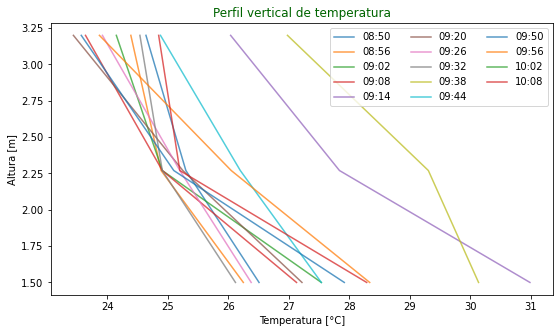

In [5]:
fig, ax = plt.subplots(1,1, figsize = (9,5))

for i in range(len(df.columns)):
  ti = df.iloc[:3,i]
  ax.plot(ti.values, ti.index, label = df.columns[i], alpha = 0.75)
ax.set_title('Perfil vertical de temperatura', color = 'darkgreen')
ax.set_ylabel('Altura [m]'); ax.set_xlabel('Temperatura [°C]')
ax.legend(ncol = 3)

Text(1.5, 25.25, 'T = -1.8205*Z + 30.2193')

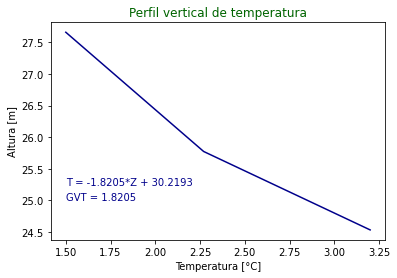

In [6]:
# Calculo de GVT promedio
t_mean = df.iloc[:3,:].mean(axis = 1)

ab_gvt = np.polyfit(x = t_mean.index, y = t_mean.values, deg = 1)

fig, ax = plt.subplots(1,1)

ax.plot(t_mean.index, t_mean.values, color = 'darkblue')
ax.set_title('Perfil vertical de temperatura', c = 'darkgreen')
ax.set_xlabel('Temperatura [°C]'); ax.set_ylabel('Altura [m]')

ax.text(x = 1.5, y = 25, s = f'GVT = {ab_gvt[0]*(-1):.4f}', color = 'darkblue')
ax.text(1.5, 25.25, s = f'T = {ab_gvt[0]:.4f}*Z + {ab_gvt[1]:.4f}', color = 'darkblue')

#### Viento

In [7]:
# Matriz de cálculo
df['u_mean'] = df.mean(axis = 1) # consideramos todas las horas

U = pd.DataFrame({'LnZ': np.log(df.index[3:6].to_numpy()), 
                  'Up': df.iloc[3:6,-1].to_numpy()})
U

,LnZ,Up
0,0.405465,0.150000
1,0.819780,1.107143
2,1.163151,1.585714


In [8]:
# Regresión lineal
ab_u = np.polyfit(x = U['LnZ'], y = (U['Up']), deg = 1)
b = ab_u[0]; a = ab_u[1]

# Zo
Zo = np.e**(-a/b)    # e**(-a/b)
print(f'Zo: {Zo:.3f} m')

# U*
U_asterisco = 0.4*b
print(f'U*: {U_asterisco:.3f} m')

Zo: 1.350 m
U*: 0.764 m


#### Grafícas Z vs U

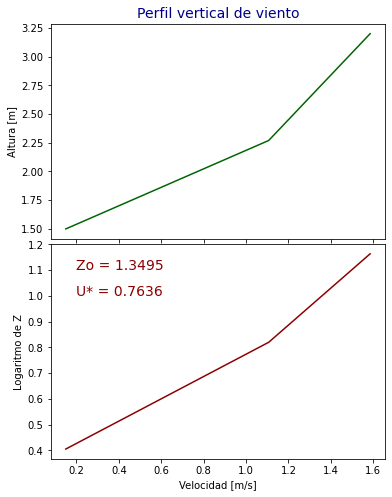

In [11]:
fig, ax = plt.subplots(2,1, figsize = (6, 8), sharex=True)

ax[0].plot(df['u_mean'].iloc[3:6].values, df.index[3:6].values, color = 'darkgreen')
ax[0].set_title('Perfil vertical de viento', c = 'darkblue', fontsize = 14)
ax[0].set_ylabel('Altura [m]')

ax[1].plot(df['u_mean'].iloc[3:6].values, np.log(df.index[3:6].values), color = 'darkred')
ax[1].set_xlabel('Velocidad [m/s]'); ax[1].set_ylabel('Logaritmo de Z')

ax[1].text(x = 0.2, y = 1.1, s = f'Zo = {Zo:.4f}', color = 'darkred', fontsize = 14)
ax[1].text(0.2, 1, s = f'U* = {U_asterisco:.4f}', color = 'darkred', fontsize = 14)

plt.subplots_adjust(hspace=0.025)

#### df


In [10]:
df

Hora,08:50,08:56,09:02,09:08,09:14,09:20,09:26,09:32,09:38,09:44,09:50,09:56,10:02,10:08,u_mean
1.50,26.51,26.25,27.54,27.13,30.99,27.22,26.38,26.12,30.14,27.54,27.92,28.34,26.86,28.29,27.659286
2.27,25.30,24.89,24.91,24.91,27.84,25.25,25.20,24.91,29.31,26.20,25.10,26.05,NaN,25.20,25.774615
3.20,24.64,24.39,24.15,23.64,26.04,23.44,23.92,24.54,26.98,24.88,23.57,23.87,24.58,24.85,24.535000
1.50,0.20,0.10,0.20,0.10,0.20,0.00,0.20,0.30,0.20,0.20,0.10,0.00,0.10,0.20,0.150000
2.27,1.10,0.90,1.40,1.20,0.70,1.10,1.20,1.30,0.90,1.30,1.60,0.90,0.80,1.10,1.107143
3.20,1.70,1.40,1.90,1.60,1.80,1.30,1.50,1.90,1.20,1.50,2.20,1.30,1.40,1.50,1.585714
